In [1]:
%cd /nobackup/sbhusha1/feature_tracking_wg/agu/

/nobackupp11/sbhusha1/feature_tracking_wg/agu


In [2]:
import os,sys,glob

import numpy as np
import pandas as pd

import geopandas as gpd
from pygeotools.lib import geolib, iolib, warplib, malib, timelib, filtlib

from imview import pltlib
import matplotlib.pyplot as plt

In [3]:
import gftt

ModuleNotFoundError: No module named 'gftt'

## First test: Use vmap with no preprocessing
In stereo_corr switch, use `--prefilter-mode` as 0

In [7]:
sample_vm = '/nobackupp11/sbhusha1/feature_tracking_wg/agu/vmap_results/parabolic_results/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s__LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_vmap_minm_65px_spm1/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s__LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_vmap_minm_65px_spm1-F_vm.tif'

/nobackupp11/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("cpt_rainbow").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

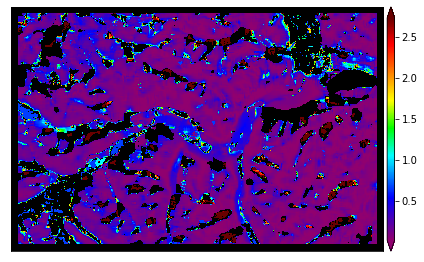

In [8]:
f,ax = plt.subplots()
pltlib.iv(iolib.fn_getma(sample_vm),ax=ax)

## Second test: Fix vmap to no-processing and using NAOF from gftt/GIV
There stereo_corr `prefilter-mode` switch still remains at 0

In [12]:
def write_naof(fn):
    ds = iolib.fn_getds(fn)
    outfn = os.path.splitext(fn)[0]+"_naof2.tif"
    iolib.writeGTiff(gftt.preprocess.naof2(iolib.ds_getma(ds)),outfn,src_ds=ds)


In [23]:
fn_list = sorted(glob.glob('data/*/*/*.TIF')) + sorted(glob.glob('data/s2/*.tif'))


In [25]:
for idx,fn in enumerate(fn_list):
    write_naof(fn)

{'count': 15467760,
 'min': -2.8284271247461907,
 'max': 2.8284271247461903,
 'ptp': 5.6568542494923815,
 'mean': -0.07562263185627734,
 'std': 2.1629146125489087,
 'nmad': 3.2801369911153926,
 'med': -0.2782893663747771,
 'median': -0.2782893663747771,
 'p16': -2.52409872039908,
 'p84': 2.5172717954386927,
 'spread': 2.5206852579188865,
 'mode': -2.341640786499874}

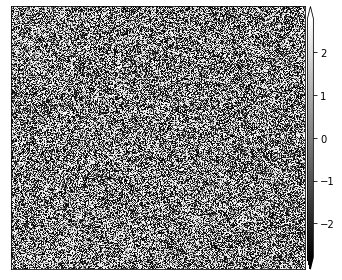

In [28]:
f,ax = plt.subplots()
ma = iolib.fn_getma(os.path.splitext(fn)[0]+"_naof2.tif")
pltlib.iv(ma,ax=ax,cmap='gray')
malib.get_stats_dict(ma)

Investigate

/nobackupp11/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

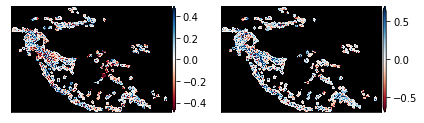

In [39]:
f,ax = plt.subplots(1,2)
vx_seed = iolib.fn_getma('/nobackupp11/sbhusha1/hma/jpl/HMA_G0240_0000_vx_masked.tif')
vy_seed = iolib.fn_getma('/nobackupp11/sbhusha1/hma/jpl/HMA_G0240_0000_vy_masked.tif')
vx_clim = malib.calcperc_sym(vx_seed,(5,95))
vy_clim = malib.calcperc_sym(vy_seed,(5,95))
pltlib.iv(vx_seed,ax=ax[0],clim=vx_clim,cmap='RdBu')
pltlib.iv(vy_seed,ax=ax[1],clim=vy_clim,cmap='RdBu')

In [44]:
#Since we are likely upsampling here, use cubicspline
vx_ds_clip, vy_ds_clip = warplib.memwarp_multi_fn(['/nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vx.tif', '/nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vy.tif'], extent=iolib.fn_getds(fn), \
        t_srs=iolib.fn_getds(fn), res=30, r='cubicspline')


Warping all inputs to the following:
Resolution: 30.0
Extent: [600000.0, 6717980.0, 641580.0, 6755180.0]
Projection: '+proj=utm +zone=7 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubicspline

1 of 2: /nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vx.tif
nl: 1240 ns: 1386 res: 30.000
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 2: /nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vy.tif
nl: 1240 ns: 1386 res: 30.000
100 - done.
0...10...20...30...40...50...60...70...80...90...

<AxesSubplot:>

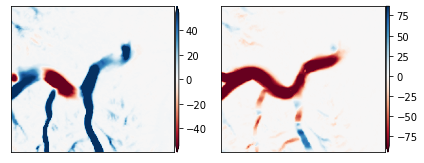

In [45]:
f,ax = plt.subplots(1,2)
vx_clim = malib.calcperc_sym(iolib.ds_getma(vx_ds_clip),(5,95))
vy_clim = malib.calcperc_sym(iolib.ds_getma(vy_ds_clip),(5,95))
pltlib.iv(iolib.ds_getma(vx_ds_clip),ax=ax[0],clim=vx_clim,cmap='RdBu')
pltlib.iv(iolib.ds_getma(vy_ds_clip),ax=ax[1],clim=vy_clim,cmap='RdBu')

In [62]:
ds1_clip_fn = '/nobackup/sbhusha1/feature_tracking_wg/agu/vmap_results/parabolic_results/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s_naof2__LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_naof2_vmap_minm_65px_spm1/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s_naof2_warp.tif'
ds2_clip_fn = '/nobackup/sbhusha1/feature_tracking_wg/agu/vmap_results/parabolic_results/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s_naof2__LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_naof2_vmap_minm_65px_spm1/LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_naof2_warp.tif'

In [63]:
#Get vx and vy arrays
vx = iolib.ds_getma(vx_ds_clip)
vy = iolib.ds_getma(vy_ds_clip)

#Determine time interval between inputs
#Use to scaling of known low-res velocities
t_factor = timelib.get_t_factor_fn(ds1_clip_fn,ds2_clip_fn)
                                   

In [67]:
outprefix = '/nobackup/sbhusha1/feature_tracking_wg/agu/vmap_results/parabolic_results/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s_naof2__LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_naof2_vmap_minm_65px_spm1/vmap'

In [70]:
ds1_clip = iolib.fn_getds(ds1_clip_fn)
ds1_res = geolib.get_res(ds1_clip, square=True)[0]

#Compute L_sub res - use this for output dimensions
L_sub_fn = outprefix+'-L_sub.tif' 
L_sub_ds = iolib.fn_getds(L_sub_fn)
L_sub_x_scale = float(ds1_clip.RasterXSize) / L_sub_ds.RasterXSize
L_sub_y_scale = float(ds1_clip.RasterYSize) / L_sub_ds.RasterYSize
L_sub_scale = np.max([L_sub_x_scale, L_sub_y_scale])
L_sub_res = ds1_res * L_sub_scale

In [82]:
vx_fn = '/nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vx.tif'
vy_fn = '/nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vy.tif'

In [83]:
vx_ds_clip, vy_ds_clip = warplib.memwarp_multi_fn([vx_fn, vy_fn], extent=ds1_clip, \
                        t_srs=ds1_clip, res=L_sub_res, r='cubicspline')


Warping all inputs to the following:
Resolution: 30.617283950617285
Extent: [584872.5, 6717982.5, 641572.5, 6755182.5]
Projection: '+proj=utm +zone=7 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubicspline

1 of 2: /nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vx.tif
nl: 1215 ns: 1852 res: 30.617
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 2: /nobackupp11/sbhusha1/feature_tracking_wg/its_live/ALA_G0120_0000_vy.tif
nl: 1215 ns: 1852 res: 30.617
100 - done.
0...10...20...30...40...50...60...70...80...90...

In [88]:
#Get vx and vy arrays
vx = iolib.ds_getma(vx_ds_clip)
vy = iolib.ds_getma(vy_ds_clip)
if t_factor is not None:
    #Compute expected offset in scaled pixels 
    dx = (vx*t_factor)/L_sub_res
    dy = (vy*t_factor)/L_sub_res
    search_window_area_thresh = 0 
    search_window = np.array([dx.min(), dy.min(), dx.max(), dy.max()])
    dx_p = malib.calcperc(dx, perc=(0.5, 99.5))
    dy_p = malib.calcperc(dy, perc=(0.5, 99.5))
    search_window = np.array([dx_p[0], dy_p[0], dx_p[1], dy_p[1]])
    search_window_area = (search_window[2]-search_window[0]) * (search_window[3]-search_window[1])
    if search_window_area < search_window_area_thresh:
        stereo_opt.extend(['--corr-seed-mode', '0'])
        stereo_opt.append('--corr-search')
        stereo_opt.extend([str(x) for x in search_window])

In [89]:
search_window

array([-0.30577144, -0.65654204,  0.46730137,  0.15505057])

In [101]:
np.ma.filled(dx,-9999)

array([[0.02827767, 0.0258065 , 0.02333992, ..., 0.001103  , 0.00130124,
        0.00146829],
       [0.02683745, 0.02435377, 0.02190476, ..., 0.00106578, 0.00127113,
        0.0014481 ],
       [0.02526965, 0.02281743, 0.02042676, ..., 0.00100947, 0.00121381,
        0.00139198],
       ...,
       [0.00200018, 0.00258677, 0.00329909, ..., 0.01054674, 0.00943394,
        0.0083348 ],
       [0.00155301, 0.00206789, 0.00270361, ..., 0.01079707, 0.00959602,
        0.00841052],
       [0.00109934, 0.0015692 , 0.00215184, ..., 0.01105945, 0.00979689,
        0.00854888]], dtype=float32)

<AxesSubplot:>

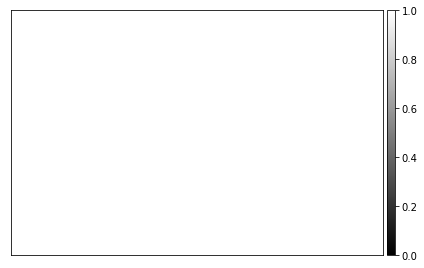

In [106]:
f,ax = plt.subplots()
pltlib.iv(~dx.mask,cmap='gray',ax=ax,clim=(0,1))

In [121]:
nl = dx.shape[0]
ns = dx.shape[1]
ndv = -9999.0
#Use GDT_Byte or GDT_Int16 to save space?
dtype = gdal.GDT_Float32
opt = iolib.gdal_opt
#d_sub_ds = iolib.gtif_drv.Create(d_sub_fn, ns, nl, 3, dtype, opt)
#d_sub_ds.GetRasterBand(1).WriteArray(np.rint(dx.filled(ndv)).astype(np.int32))
#d_sub_ds.GetRasterBand(2).WriteArray(np.rint(dy.filled(ndv)).astype(np.int32))
#d_sub_ds.GetRasterBand(3).WriteArray((~dx.mask).astype(np.int32))

In [122]:
d_sub_ds = iolib.gtif_drv.Create(d_sub_fn, ns, nl, 3, dtype, opt)
d_sub_ds.GetRasterBand(1).WriteArray(np.rint(dx.filled(ndv)))
d_sub_ds.GetRasterBand(2).WriteArray(np.rint(dy.filled(ndv)))
d_sub_ds.GetRasterBand(3).WriteArray((~dx.mask))
for n in range(1, d_sub_ds.RasterCount+1):
    band = d_sub_ds.GetRasterBand(n)
    band.SetNoDataValue(ndv)
d_sub_ds = None

In [127]:
malib.get_stats_dict(iolib.fn_getma(d_sub_fn,1))

{'count': 2250180,
 'min': -1.0,
 'max': 1.0,
 'ptp': 2.0,
 'mean': 0.0017678585713142949,
 'std': 0.05798989241288846,
 'nmad': 0.0,
 'med': 0.0,
 'median': 0.0,
 'p16': 0.0,
 'p84': 0.0,
 'spread': 0.0,
 'mode': -0.0}

/nobackupp11/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("cpt_rainbow").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

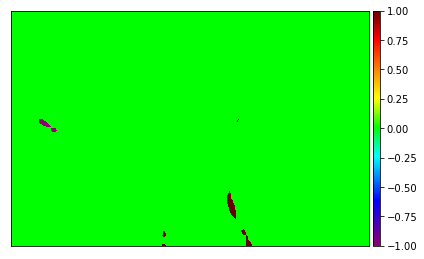

In [128]:
f,ax = plt.subplots()
pltlib.iv(iolib.fn_getma(d_sub_fn,1),ax=ax,clim=(-1,1))

<AxesSubplot:>

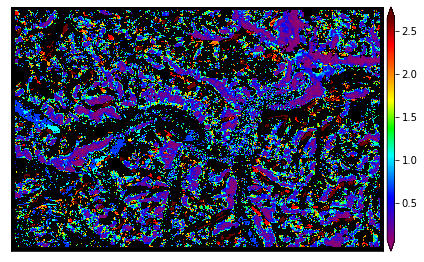

In [131]:
test_fn = '/nobackupp11/sbhusha1/feature_tracking_wg/agu/vmap_results/parabolic_results/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s__LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_vmap_minm_39px_spm1/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s__LC08_L1TP_061018_20180405_20180417_01_T1_B8_s_vmap_minm_39px_spm1-F_vm.tif'
f,ax = plt.subplots()
pltlib.iv(iolib.fn_getma(test_fn),ax=ax)

In [97]:
opt

['COMPRESS=LZW', 'TILED=YES', 'BIGTIFF=IF_SAFER']

<AxesSubplot:>

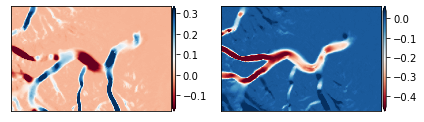

In [130]:
f,ax = plt.subplots(1,2)

pltlib.iv(dx,ax=ax[0],cmap='RdBu')
pltlib.iv(dy,ax=ax[1],cmap='RdBu')


## Apply fix to -2 to 2 bounds

In [132]:
naof_files = sorted(glob.glob('/nobackupp11/sbhusha1/feature_tracking_wg/agu/data/l8/pair1/*naof2.tif'))

In [134]:
naof_ds_list = [iolib.fn_getds(fn) for fn in naof_files]
naof_ma_list = [iolib.ds_getma(ds) for ds in naof_ds_list]

In [135]:
malib.get_stats_dict(naof_ma_list)

{'count': 18748800,
 'min': -2.8284271247461907,
 'max': 2.8284271247461903,
 'ptp': 5.6568542494923815,
 'mean': -0.008471727112946083,
 'std': 2.155124986699454,
 'nmad': 3.4077719070017736,
 'med': -0.032866948731870294,
 'median': -0.032866948731870294,
 'p16': -2.4987313251190546,
 'p84': 2.5072644173154566,
 'spread': 2.5029978712172554,
 'mode': -2.341640786499874}

In [150]:
for idx,naof_ma in enumerate(naof_ma_list):
    min_ = np.ma.min(naof_ma)
    max_ = np.ma.max(naof_ma)
    naof_norm = (naof_ma-min_)/(max_-min_)
    #naof_ma = (naof_ma+(-1*min_))*100
    outnaof = os.path.splitext(naof_files[idx])[0]+'_positive.tif'
    iolib.writeGTiff(naof_norm,outnaof,src_ds=naof_ds_list[idx])
    

In [139]:
%matplotlib widget

/nobackupp11/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("gray").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
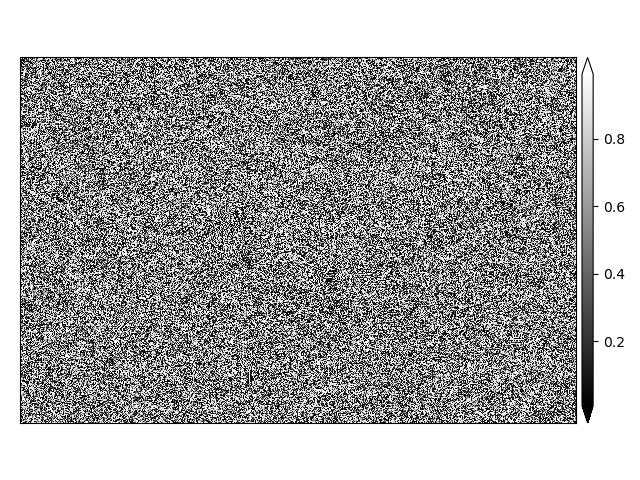

In [151]:
f,ax = plt.subplots()
pltlib.iv(naof_norm,ax=ax,cmap='gray')

In [145]:
malib.get_stats_dict(naof_ma)

{'count': 9374400,
 'min': 0.0,
 'max': 565.6854249492382,
 'ptp': 565.6854249492382,
 'mean': 284.2045510430394,
 'std': 215.4652970798704,
 'nmad': 340.9351257633956,
 'med': 286.1073220057784,
 'median': 286.1073220057784,
 'p16': 33.35145679712961,
 'p84': 533.6602097859097,
 'spread': 250.15437649439005,
 'mode': 282.8427124746191}

In [147]:
mean = 284.2045510430394
sigma = 215.4652970798704
(mean+2.5*sigma,mean-2.5*sigma)

(822.8677937427153, -254.45869165663657)

In [148]:
min_ = 0
max_ = 565.6854249492382
naof_norm = (naof_ma-min_)/(max_-min_)

/nobackupp11/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("gray").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
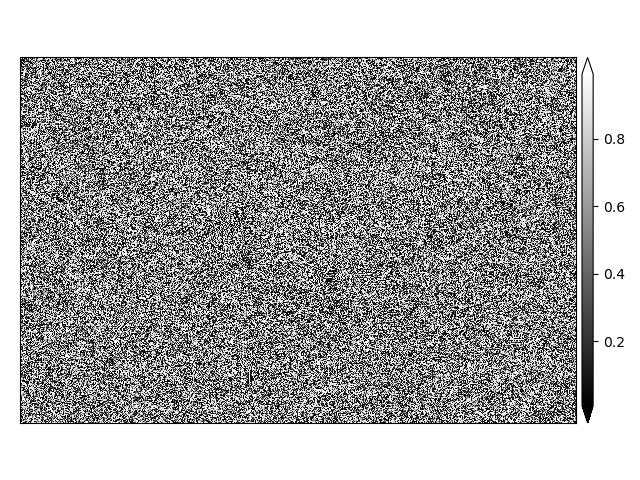

In [149]:
f,ax = plt.subplots()
pltlib.iv(naof_norm,ax=ax,cmap='gray')

## AutoRIFT processing

In [4]:
from autoRIFT import autoRIFT

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce


In [5]:
obj = autoRIFT()

In [ ]:
obj.pre

### Gaussian filter for autoRIFT

In [7]:
fn_list = sorted(glob.glob('../data/*/*/*s.TIF')) + sorted(glob.glob('../data/s2/*s.tif'))

In [8]:
len(fn_list)

8

In [9]:
fn_list

['../data/l8/pair1/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s.TIF',
 '../data/l8/pair1/LC08_L1TP_061018_20180405_20180417_01_T1_B8_s.TIF',
 '../data/l8/pair2/LC08_L1TP_062017_20180802_20180814_01_T1_B8_s.TIF',
 '../data/l8/pair2/LC08_L1TP_062017_20180818_20180829_01_T1_B8_s.TIF',
 '../data/s2/T07VFH_20180304T204329_B04_s.tif',
 '../data/s2/T07VFH_20180314T204219_B04_s.tif',
 '../data/s2/T07VFH_20180508T204021_B04_s.tif',
 '../data/s2/T07VFH_20180627T204021_B04_s.tif']

In [10]:
im = filtlib.highpass(iolib.fn_getma(fn_list[0]),size=25)

Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)


In [12]:
%matplotlib widget

In [13]:
f,ax = plt.subplots()
pltlib.iv(im,ax=ax,cmap='gray')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/nobackupp11/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("gray").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

In [16]:
def prep_autorift_hp(fn):
    ds = iolib.fn_getds(fn)
    ma = iolib.ds_getma(ds)
    outfn = os.path.splitext(fn)[0]+'_gauss_hp.tif'
    iolib.writeGTiff(filtlib.highpass(ma,size=25),outfn,src_ds=ds)

In [17]:
for idx,fn in enumerate(fn_list):
    print(f"****IDX {idx} ****")
    prep_autorift_hp(fn)
    

****IDX 0 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)
****IDX 1 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)
****IDX 2 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)
****IDX 3 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)
****IDX 4 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)
****IDX 5 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)
****IDX 6 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)
****IDX 7 ****
Applying gaussian smoothing filter with size 25 and sigma 4.000 (sum 0.996)


In [6]:
%cd autorift_results/

/nobackupp11/sbhusha1/feature_tracking_wg/agu/autorift_results


In [12]:
pairs = [(fn_list[0],fn_list[1]),(fn_list[2],fn_list[3]),(fn_list[4],fn_list[5]), (fn_list[6],fn_list[7])]

In [13]:
skip = [4,8]
kernel = [32,64]

In [15]:
nopreproc = 'autoRIFT_noPreproc.txt'
with open(nopreproc,'w') as f:
    for idx,pair in enumerate(pairs):
        for skip_size in skip:
            for kernel_size in kernel:
                outjob = f"autoRIFT_vmap.py {pair[0]} {pair[1]} -skip_rate {skip_size} -convert8bit -contrast_filter none -fix_chipsize_range '{kernel_size} {kernel_size}' -dt day\n"
                f.write(outjob)

In [19]:
nopreproc = 'autoRIFT_naof.txt'
with open(nopreproc,'w') as f:
    for idx,pair in enumerate(pairs):
        for skip_size in skip:
            for kernel_size in kernel:
                f1 = os.path.splitext(pair[0])[0]+'_naof2.tif'
                f2 = os.path.splitext(pair[1])[0]+'_naof2.tif'
                outjob = f"autoRIFT_vmap.py {f1} {f2} -skip_rate {skip_size} -convert8bit -contrast_filter none -fix_chipsize_range '{kernel_size} {kernel_size}' -dt day\n"
                f.write(outjob)

In [18]:
nopreproc = 'autoRIFT_gauss.txt'
with open(nopreproc,'w') as f:
    for idx,pair in enumerate(pairs):
        for skip_size in skip:
            for kernel_size in kernel:
                f1 = os.path.splitext(pair[0])[0]+'_gauss_hp.tif'
                f2 = os.path.splitext(pair[1])[0]+'_gauss_hp.tif'
                outjob = f"autoRIFT_vmap.py {f1} {f2} -skip_rate {skip_size} -convert8bit -contrast_filter none -fix_chipsize_range '{kernel_size} {kernel_size}' -dt day\n"
                f.write(outjob)